#  Implementação de um Pipeline de Dados 
##  Viagem ao espaco

# Descrição do Desafio: 
Bem vindo ao ano de 2912, onde suas habilidades em ciência de dados são fáceis para resolver um mistério cósmico. Recebemos uma transmissão de quatro anos-luz de distância e as coisas não parecem boas.

A Nave Titanic foi um navio de passageiros interestelar lançado há um mês. Com quase 13.000 passageiros a bordo, o navio iniciou a sua viagem inaugural transportando emigrantes do nosso sistema solar para três exoplanetas recentemente habitáveis ​​que orbitam estrelas próximas.

Ao contornar Alfa Centauri no caminho do seu primeiro destino – o tórrido 55 Cancri E – a incauta Nave Espacial Titanic colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Infelizmente, teve um destino semelhante ao de seu homônimo de 1000 anos antes. Embora o navio tenha permanecido intacto, quase metade dos passageiros foram transportados para uma dimensão alternativa!

Para ajudar as tripulações de resgate e recuperar os passageiros perdidos, você é desafiado a prever quais passageiros foram transportados por anomalia usando registros recuperados do sistema de computador danificado da nave espacial.

In [47]:
# Importando bibliotecas necessárias
import pandas as pd

## Descrição das bases:
train.csv - Registros pessoais de cerca de dois terços (~8.700) dos passageiros, para serem usados ​​como dados de treinamento.

PassengerId- Um ID único para cada passageiro. Cada Id assume a forma gggg_pponde ggggindica o grupo com o qual o passageiro está viajando e ppé o seu número dentro do grupo. As pessoas de um grupo são frequentemente membros da família, mas nem sempre.
HomePlanet- O planeta de onde o passageiro partiu, normalmente o planeta de residência permanente.

CryoSleep- Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. Os passageiros em sono criogênico ficam confinados em suas cabines.

Cabin- O número da cabine onde o passageiro está hospedado. Assume a forma deck/num/side, sidepodendo ser tanto Ppara Bombordo como Spara Estibordo .

Destination- O planeta para onde o passageiro irá desembarcar.

Age- A idade do passageiro.

VIP- Se o passageiro pagou por serviço VIP especial durante a viagem.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Valor que o passageiro faturou em cada uma das muitas comodidades de luxo da nave espacial 
Titanic .
Name- O nome e sobrenome do passageiro.

Transported- Se o passageiro foi transportado para outra dimensão. Este é o alvo, a coluna que você está tentando prever.

test.csv - Registros pessoais do terço restante (~4.300) dos passageiros, para serem usados ​​como dados de teste. Sua tarefa é prever o valor de 

Transportedpara os passageiros deste conjunto.

sample_submission.csv – Um arquivo de envio no formato correto.

PassengerId- ID de cada passageiro no conjunto de teste.

Transported- O alvo. Para cada passageiro, preveja Trueou False.

### Pré-processamento de dados:

In [48]:
# Carregando conjuntos de dados
sampre_sub = pd.read_csv(r'D:\Repositorios\machine_learning_classificacao\Missao_espaco\sample_submission.csv')
test = pd.read_csv(r'D:\Repositorios\machine_learning_classificacao\Missao_espaco\test.csv')
train = pd.read_csv(r'D:\Repositorios\machine_learning_classificacao\Missao_espaco\train.csv')

In [49]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [51]:
import plotly.express as px

In [52]:
# Visualizando distribuição da variável alvo
px.histogram(train, x='Transported', text_auto=True)

In [53]:
# Visualizando relação entre variáveis categóricas e a variável alvo
px.histogram(train, x ='CryoSleep', text_auto=True, color='Transported', barmode='group' )

In [54]:
px.histogram(train, x ='Destination', text_auto=True, color='Transported', barmode='group' )

In [55]:
px.histogram(train, x ='VIP', text_auto=True, color='Transported', barmode='group' )

In [56]:
# Preparando os dados para modelagem
x = train.drop(['Transported','Cabin','Name'] , axis = 1)
y = train['Transported']

### Treinamento do modelo:

In [57]:
from sklearn.compose import  make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [58]:
# Codificando variáveis categóricas
colunas = x.columns
one_hot = make_column_transformer((OneHotEncoder(drop= 'if_binary'), ['HomePlanet',	'Destination',	'VIP']
                                   ), 
                                   remainder='passthrough',
                                 sparse_threshold=0)

In [59]:
x = one_hot.fit_transform(x)

In [60]:
x

array([[0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, ..., 25.0, 549.0, 44.0],
       [0.0, 1.0, 0.0, ..., 0.0, 6715.0, 49.0],
       ...,
       [1.0, 0.0, 0.0, ..., 1872.0, 1.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.0, 353.0, 3235.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 12.0]], dtype=object)

In [61]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__HomePlanet_Earth',
       'onehotencoder__HomePlanet_Europa',
       'onehotencoder__HomePlanet_Mars', 'onehotencoder__HomePlanet_nan',
       'onehotencoder__Destination_55 Cancri e',
       'onehotencoder__Destination_PSO J318.5-22',
       'onehotencoder__Destination_TRAPPIST-1e',
       'onehotencoder__Destination_nan', 'onehotencoder__VIP_False',
       'onehotencoder__VIP_True', 'onehotencoder__VIP_nan',
       'remainder__PassengerId', 'remainder__CryoSleep', 'remainder__Age',
       'remainder__RoomService', 'remainder__FoodCourt',
       'remainder__ShoppingMall', 'remainder__Spa', 'remainder__VRDeck'],
      dtype=object)

In [62]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__HomePlanet_Earth,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__Destination_55 Cancri e,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_False,onehotencoder__VIP_True,onehotencoder__VIP_nan,remainder__PassengerId,remainder__CryoSleep,remainder__Age,remainder__RoomService,remainder__FoodCourt,remainder__ShoppingMall,remainder__Spa,remainder__VRDeck
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0001_01,False,39.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0002_01,False,24.0,109.0,9.0,25.0,549.0,44.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0003_01,False,58.0,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0003_02,False,33.0,0.0,1283.0,371.0,3329.0,193.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0004_01,False,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9276_01,False,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9278_01,True,18.0,0.0,0.0,0.0,0.0,0.0
8690,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9279_01,False,26.0,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9280_01,False,32.0,0.0,1049.0,0.0,353.0,3235.0


In [63]:
from sklearn.preprocessing import LabelEncoder
Label_ecoder = LabelEncoder()

In [64]:
# Codificando a variável alvo
y = Label_ecoder.fit_transform(y)
y

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

Criando classificação de referência

In [65]:
from sklearn.model_selection import train_test_split
# Dividindo os dados em conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,  stratify= y)

In [66]:
# Treinando um classificador dummy para estabelecer uma linha de base
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

DummyClassifier()

In [67]:
dummy.score(x_teste, y_teste)

0.5036798528058878

Modelo de decisão de referência contém 0.503 de acurácia

In [68]:
#Treinando uma árvore de decisão padrão e avaliando seu desempenho
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(random_state=5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [69]:
arvore.predict(x_teste)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [70]:
arvore.score(x_teste, y_teste)

0.7249310027598896

Árvore de decisão padrão pontuou: 0.744

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [72]:
colunas

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [73]:
nome_colunas = ['PassengerId', 'HomePlanet', 'CryoSleep','Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Name' ]

[Text(0.6631735843291777, 0.984375, 'x[12] <= 0.5\ngini = 0.5\nsamples = 6519\nvalue = [3236, 3283]\nclass = SIM'),
 Text(0.5301988100167712, 0.953125, 'x[14] <= 346.5\ngini = 0.445\nsamples = 4232\nvalue = [2820, 1412]\nclass = Não'),
 Text(0.40163333465304896, 0.921875, 'x[18] <= 129.5\ngini = 0.477\nsamples = 3134\nvalue = [1900, 1234]\nclass = Não'),
 Text(0.30813732852351083, 0.890625, 'x[17] <= 257.5\ngini = 0.5\nsamples = 2012\nvalue = [1017, 995]\nclass = Não'),
 Text(0.24842967906247404, 0.859375, 'x[1] <= 0.5\ngini = 0.472\nsamples = 1405\nvalue = [536, 869]\nclass = SIM'),
 Text(0.20469353607626484, 0.828125, 'x[16] <= 1540.5\ngini = 0.487\nsamples = 1232\nvalue = [518, 714]\nclass = SIM'),
 Text(0.12413327137160422, 0.796875, 'x[13] <= 7.5\ngini = 0.493\nsamples = 1170\nvalue = [515, 655]\nclass = SIM'),
 Text(0.03015701586774113, 0.765625, 'x[2] <= 0.5\ngini = 0.412\nsamples = 207\nvalue = [60, 147]\nclass = SIM'),
 Text(0.029093627980393787, 0.734375, 'x[11] <= 466205.5\n

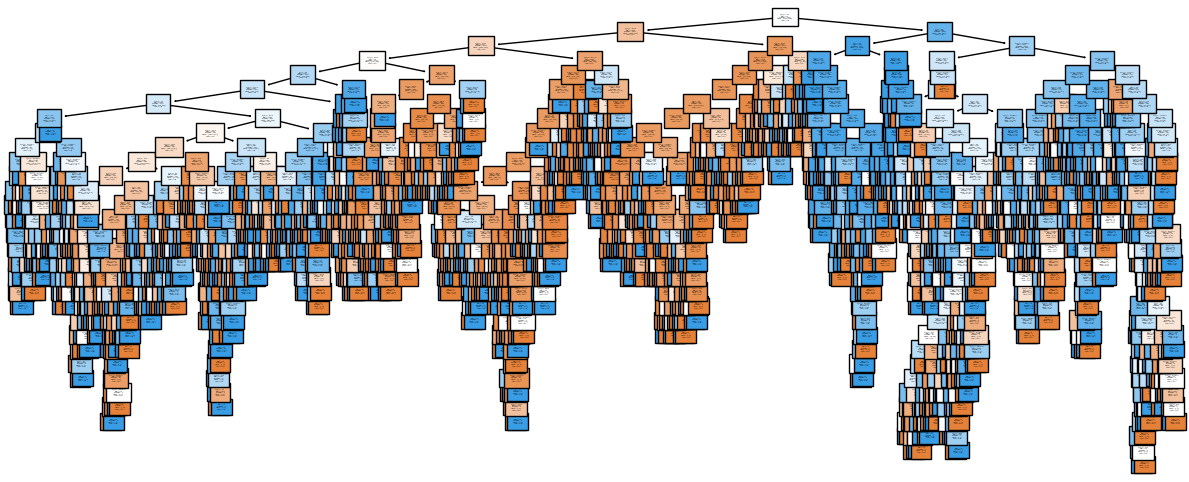

In [74]:
# Visualizando a árvore de decisão
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled= True, class_names =['Não', 'SIM'], fontsize= 1)

In [75]:
# validando base de treino
arvore.score(x_treino, y_treino)

0.9993864089584292

#### Processando alterando quantidade de ramos para 6

In [76]:
arvore = DecisionTreeClassifier(max_depth=6)
arvore.fit(x_treino, y_treino)
arvore.score(x_treino, y_treino)

0.7938334100322135

In [77]:
arvore.score(x_teste, y_teste)

0.7690892364305428

[Text(0.5514322916666666, 0.9285714285714286, 'x[12] <= 0.5\ngini = 0.5\nsamples = 6519\nvalue = [3236, 3283]\nclass = sim'),
 Text(0.3255208333333333, 0.7857142857142857, 'x[14] <= 346.5\ngini = 0.445\nsamples = 4232\nvalue = [2820, 1412]\nclass = não'),
 Text(0.16666666666666666, 0.6428571428571429, 'x[18] <= 129.5\ngini = 0.477\nsamples = 3134\nvalue = [1900, 1234]\nclass = não'),
 Text(0.08333333333333333, 0.5, 'x[17] <= 257.5\ngini = 0.5\nsamples = 2012\nvalue = [1017, 995]\nclass = não'),
 Text(0.041666666666666664, 0.35714285714285715, 'x[1] <= 0.5\ngini = 0.472\nsamples = 1405\nvalue = [536, 869]\nclass = sim'),
 Text(0.020833333333333332, 0.21428571428571427, 'x[16] <= 1540.5\ngini = 0.487\nsamples = 1232\nvalue = [518, 714]\nclass = sim'),
 Text(0.010416666666666666, 0.07142857142857142, 'gini = 0.493\nsamples = 1170\nvalue = [515, 655]\nclass = sim'),
 Text(0.03125, 0.07142857142857142, 'gini = 0.092\nsamples = 62\nvalue = [3, 59]\nclass = sim'),
 Text(0.0625, 0.214285714285

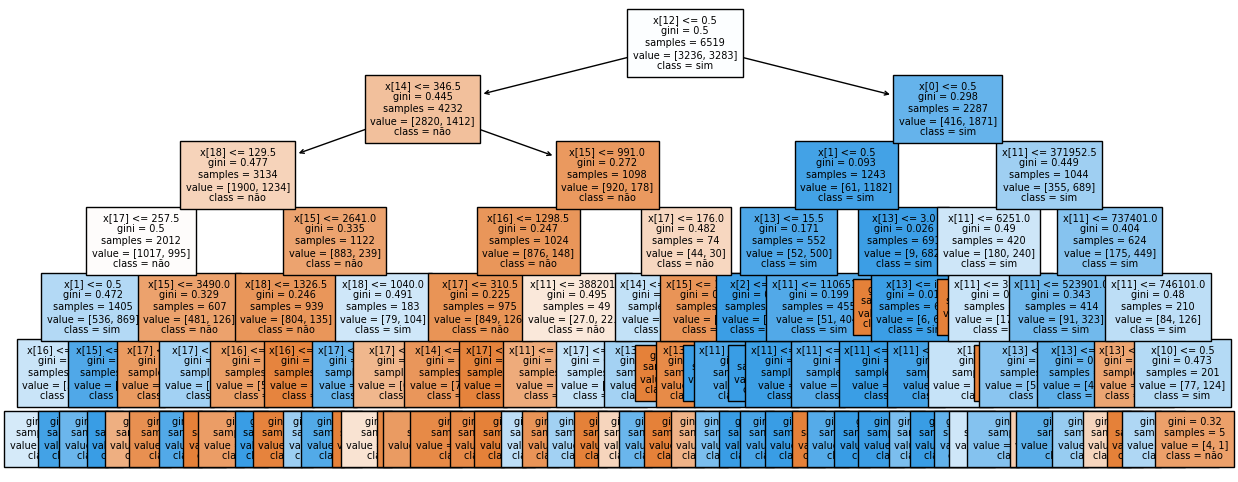

In [78]:
# Visualizando a árvore de decisão com profundidade máxima de 6
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled= True, class_names =['não', 'sim'], fontsize= 7)

Salvando modelo para o pipeline

In [79]:
# Importando a biblioteca pickle para salvar e carregar objetos Python em arquivos
import pickle

In [80]:
# Salvando o modelo de árvore de decisão em um arquivo .pkl
with open('modelo_arvore.pkl', 'wb') as arquivo:
    pickle.dump(arvore, arquivo)

In [81]:
# Salvando o objeto de transformação one-hot em um arquivo .pkl
with open('modelo_one_hot.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)

In [82]:
# Carregando o objeto de transformação one-hot de um arquivo .pkl
modelo_one_hot = pd.read_pickle('D:\Repositorios\machine_learning_classificacao\Missao_espaco\modelo_one_hot.pkl')
modelo_arvore = pd.read_pickle('D:\Repositorios\machine_learning_classificacao\Missao_espaco\modelo_arvore.pkl')

In [83]:
# Aplicando a transformação one-hot aos dados de teste
novo_teste = modelo_one_hot.transform(test)

In [84]:
# Realizando previsões utilizando o modelo de árvore de decisão carregad
test['Transported'] = modelo_arvore.predict(novo_teste)

In [85]:
# Convertendo os valores de 'Transported' para True ou False
coluna = test['Transported']

# Use o método replace para substituir os valores
coluna_convertida = coluna.replace({1: True, 0: False})

In [86]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1


In [87]:
test.drop(['Transported'] , axis = 1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [88]:
test['Transported'] = coluna_convertida


In [89]:
# Criando o DataFrame final contendo 'PassengerId' e 'Transported'
df_final = test[['PassengerId', 'Transported']]
df_final

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [90]:
# Salvando o DataFrame final em um arquivo .csv para submissão no Kaggle
df_final.to_csv('Kaggle_precisao_jv.csv', index=False)